## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = mouse_metadata.merge(study_results)
# Display the data table for preview
# print(data.shape)
data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = data['Mouse ID'].nunique()
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = data[data.duplicated(['Mouse ID', 'Timepoint'])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = data.loc[data['Mouse ID'] == 'g989',]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data = data.loc[data['Mouse ID'] != 'g989',]
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice = data['Mouse ID'].nunique()
total_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = round(data.groupby('Drug Regimen').mean(),1)
drug_mean = drug_mean['Tumor Volume (mm3)']
drug_median = round(data.groupby('Drug Regimen').median(),1)
drug_median = drug_median['Tumor Volume (mm3)']
drug_std = round(data.groupby('Drug Regimen').std(),2)
drug_std = drug_std['Tumor Volume (mm3)']
drug_sem = round(data.groupby('Drug Regimen').sem(),3)
drug_sem = drug_sem['Tumor Volume (mm3)']


# Assemble the resulting series into a single summary dataframe.
drugs_data = pd.DataFrame({'Mean': drug_mean, 'Median': drug_median, 'Standard Deviation': drug_std, 'Error': drug_sem})
drugs_data

,Mean,Median,Standard Deviation,Error
Drug Regimen,,,,
Capomulin,40.7,41.6,4.99,0.329
Ceftamin,52.6,51.8,6.27,0.470
Infubinol,52.9,51.8,6.57,0.492
Ketapril,55.2,53.7,8.28,0.604
Naftisol,54.3,52.5,8.13,0.596
Placebo,54.0,52.3,7.82,0.581
Propriva,52.3,50.4,6.62,0.544
Ramicane,40.2,40.7,4.85,0.321
Stelasyn,54.2,52.4,7.71,0.573


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

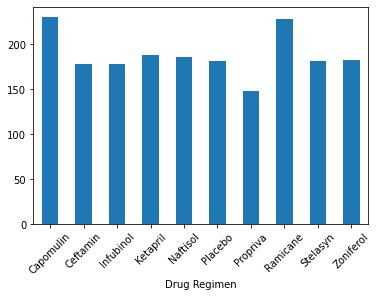

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drugs_count = data.groupby('Drug Regimen').count()
drugs_count['Mouse ID'].plot(kind='bar', rot = 45)


Text(0.5, 0, 'Drug Regimen')

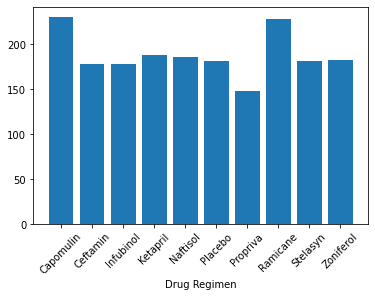

In [21]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
labels = list(drugs_count.index.values)
x_axis = np.arange(len(labels))
plt.xticks(x_axis, labels, rotation = 45)
plt.bar(x_axis, drugs_count['Mouse ID'])
plt.xlabel('Drug Regimen')





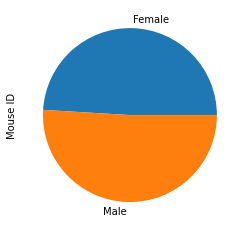

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = data.groupby('Sex').count()
gender_count['Mouse ID'].plot(kind='pie')


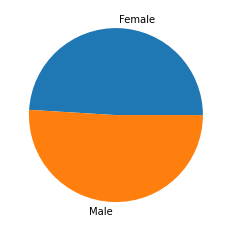

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = list(gender_count.index.values)
plt.pie(gender_count['Mouse ID'], labels=labels)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
